In [105]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as pl
from astropy.coordinates import SkyCoord
from astropy import units as u
from tqdm import tqdm

In [106]:
cycle2 = pd.read_csv('tess_cycle_2_prediction.dat')

In [107]:
result = None
for field in tqdm(range(len(cycle2))):
    for camera in [1, 2, 3, 4]:
        ra = cycle2[f'Cam{camera}RA'][field]
        dec = cycle2[f'Cam{camera}Dec'][field]
        df = pd.read_hdf(f'catalog/sector{field}-camera{camera}.hf5')
        crd_camera = SkyCoord(ra, dec, unit='deg').barycentrictrueecliptic
        crd_asteroids = SkyCoord(df.index.get_level_values(1), df.index.get_level_values(2), unit=(u.hourangle, u.deg)).barycentrictrueecliptic
        mask = ((crd_asteroids.lon.deg > (crd_camera.lon.deg - 12))
                & (crd_asteroids.lon.deg < (crd_camera.lon.deg + 12))
                & (crd_asteroids.lat.deg > (crd_camera.lat.deg - 12))
                & (crd_asteroids.lat.deg < (crd_camera.lat.deg + 12))
               )
        if result is None:
            result = df[mask]
        else:
            result = result.append(df[mask])

100%|██████████| 13/13 [01:29<00:00,  8.31s/it]


In [108]:
len(result)

95596

In [110]:
result.to_excel("asteroids.xlsx")

KeyboardInterrupt: 

In [111]:
idx = result.index

In [112]:
len(idx.to_frame().Name.unique())

95590

In [113]:
crd = SkyCoord(result.index.get_level_values(1), result.index.get_level_values(2), unit=(u.hourangle, u.deg))

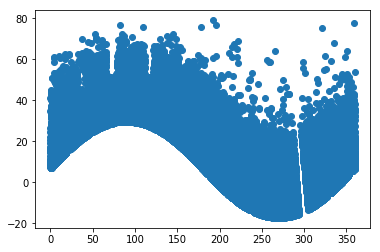

In [114]:
#mask = crd.barycentrictrueecliptic.lat.deg > 6
#pl.scatter(crd.ra[mask], crd.dec[mask])
pl.scatter(crd.ra, crd.dec)